# **Project-3**

***Project Title:*** Customer Segmentation

***Project Description:*** In this project, you will build a machine learning model to segment customers based on their demographics and spending behavior. The data set includes information on customers' age, gender, annual income, and spending score (a metric assigned by the mall based on how much customers spend and how often they visit).

***Dataset Details:*** The data set contains 200 records of customers.

***Datasets Location:*** Canvas -> Modules -> Week 13 -> Dataset -> **"customers.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several unsupervised clustering models on the preprocessed data set, including k-means clustering and DBSCAN.

3) *Model Evaluation:* You will evaluate the clustering results using silhouette and inertia scores. You will also analyze the resulting customer segments and interpret their characteristics.

4) *Deployment:* Once you have identified the customer segments, you can use them to personalize marketing campaigns, improve customer retention, and optimize product recommendations.

This project will give you hands-on experience with unsupervised clustering, data preprocessing, and model evaluation. It also has real-world applications in marketing and e-commerce, where customer segmentation can help businesses tailor their offerings to different customer groups.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


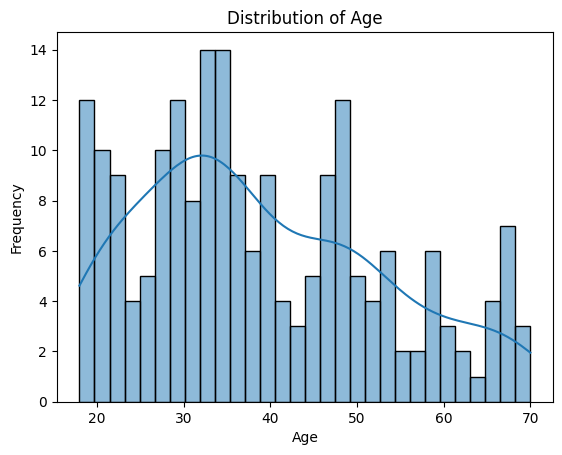

In [ ]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

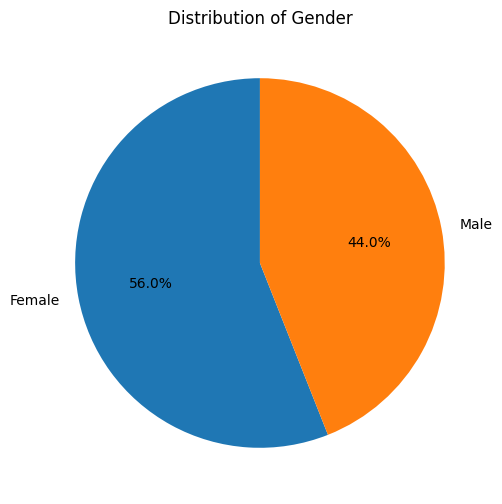

In [ ]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.show()

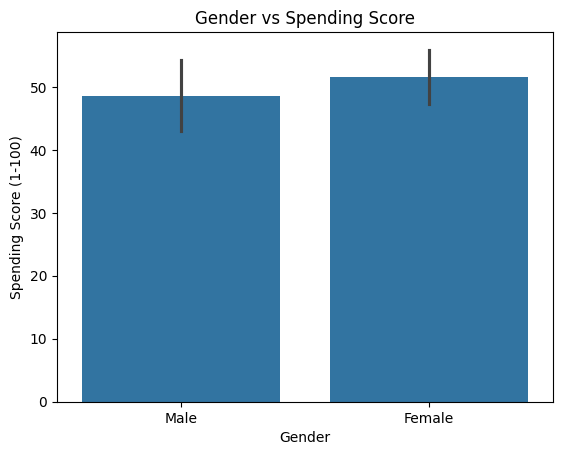

In [ ]:
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Gender vs Spending Score')
plt.show()

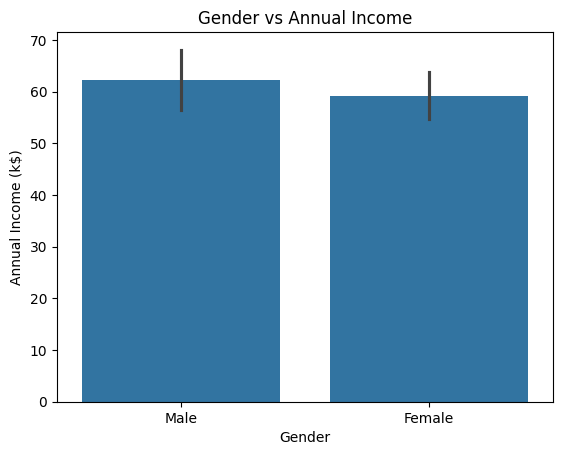

In [ ]:
sns.barplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Gender vs Annual Income')
plt.show()

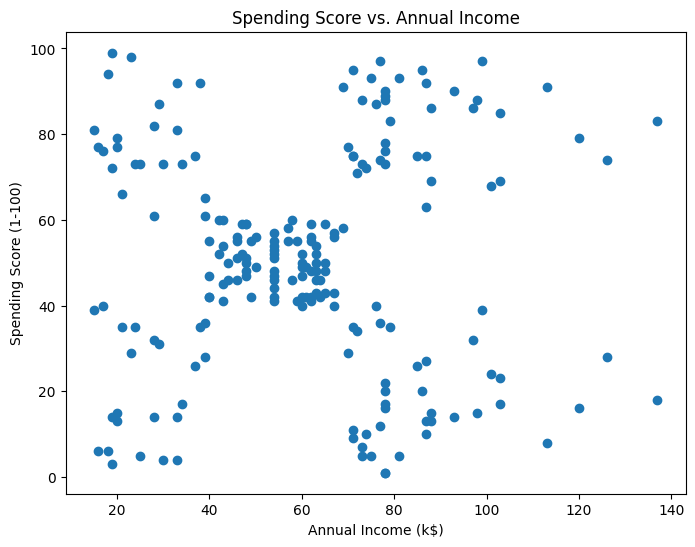

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Spending Score vs. Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

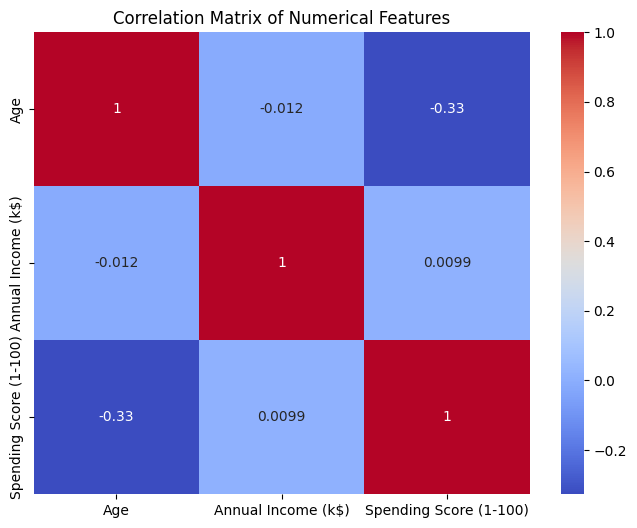

In [ ]:
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Making Gender a numerical value
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize data
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Annual Income (k$)', 'Spending Score (1-100)']]
)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

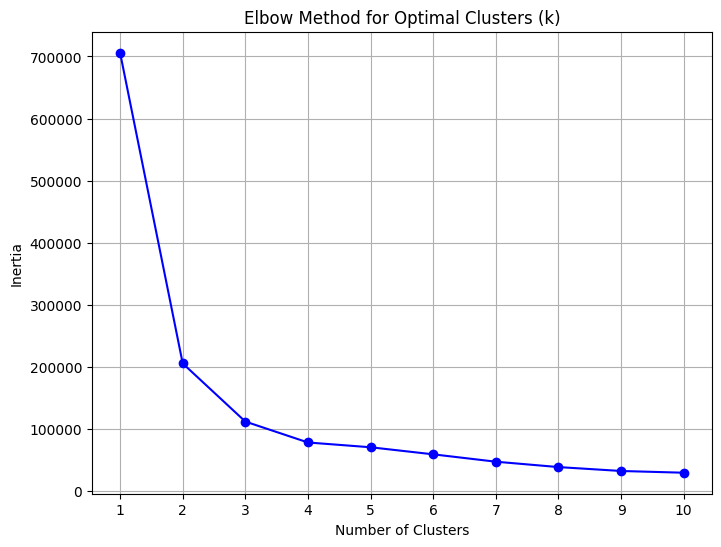

In [ ]:
# Sets range of clusters
cluster_range = range(1, 11)
inertia_values = []

# Fit KMeans for cluster range
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', color='b')
plt.title("Elbow Method for Optimal Clusters (k)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

#K-Means

In [ ]:
# Groups the dataset
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


#Cluster Creation and Centroids
df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
#Silhouette Score
kmeans_silhouette = silhouette_score(X,df['Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

Silhouette Score for K-Means: 0.5240881005293663


In [ ]:
#The tightness round the centroid
print(f"K-Means Inertia: {kmeans.inertia_}")

K-Means Inertia: 1979.390204004877


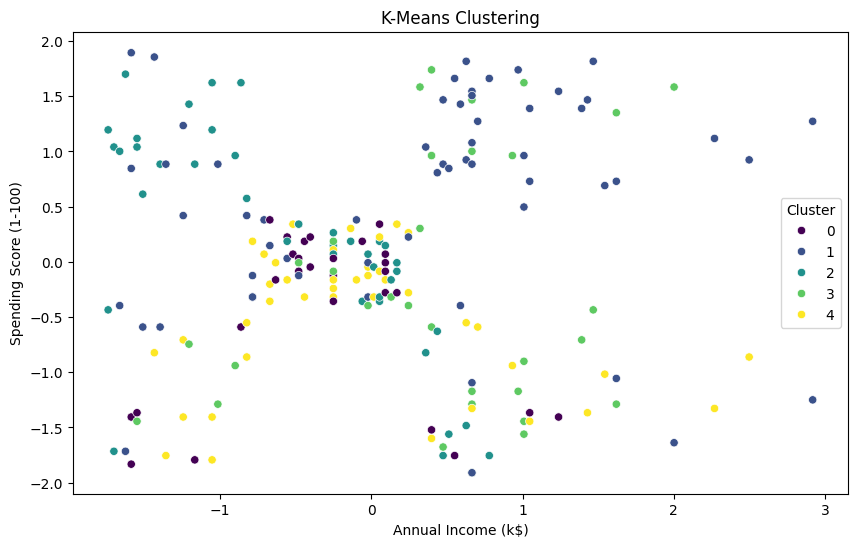

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title("K-Means Clustering")
plt.show()

#DBSCAN

In [ ]:
# Initialize Dbscan
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(X)

#Dbscan Cluster
df['DBSCAN_Cluster'] = dbscan.labels_

In [ ]:
# Silhouette score for DBSCAN
valid_points = df[df['DBSCAN_Cluster'] != -1]
if len(valid_points['DBSCAN_Cluster'].unique()) > 1:
    silhouette_dbscan = silhouette_score(
        valid_points[['Annual Income (k$)','Spending Score (1-100)','Age', ]],
        valid_points['DBSCAN_Cluster']
    )
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("Silhouette Score for DBSCAN cannot be computed (no valid points).")

Silhouette Score for DBSCAN: 0.9671278544842861


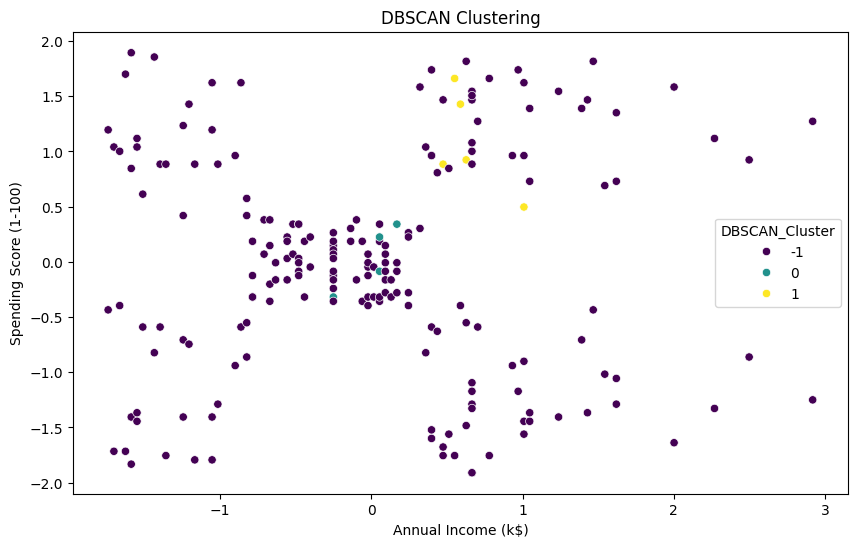

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title("DBSCAN Clustering")
plt.show()

#GaussianMixture

In [ ]:
n_components = 4
silhouette_scores = []
df['GaussianMixture_Cluster'] = dbscan.labels_

# Fit GMM for each number of components and calculate the silhouette score
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(df)
score = silhouette_score(df, labels)

print(f"Silhouette Score for GMM: {score}")

Silhouette Score for GMM: 0.279304937013962


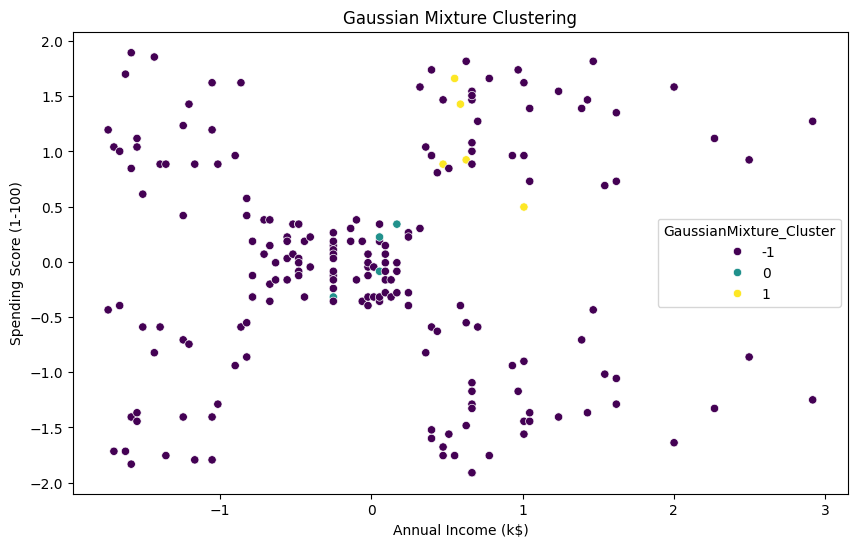

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='GaussianMixture_Cluster', data=df, palette='viridis')
plt.title("Gaussian Mixture Clustering")
plt.show()

#Cluster Findings

In [ ]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         82.321429  0.642857  63.535714           -0.296740   
1        118.000000  0.362069  31.258621            0.303065   
2         69.375000  0.500000  21.400000           -0.544296   
3        130.393939  0.454545  39.242424            0.448225   
4         94.463415  0.341463  49.439024           -0.055820   

         Spending Score (1-100)  DBSCAN_Cluster  GaussianMixture_Cluster  
Cluster                                                                   
0                     -0.454212       -1.000000                -1.000000  
1                      0.566527       -0.827586                -0.827586  
2                      0.183432       -1.000000                -1.000000  
3                     -0.183050       -1.000000                -1.000000  
4                     -0.522860       -0.902439                -0.902439  


In [ ]:
cluster_medians = df.groupby('Cluster').median()
print(cluster_medians)

         CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                         
0              74.5     1.0  64.5           -0.326730               -0.104818   
1             142.5     0.0  31.0            0.570251                0.846310   
2              72.5     0.5  21.0           -0.364900                0.186343   
3             137.0     0.0  39.0            0.474828               -0.395980   
4              87.0     0.0  49.0           -0.135883               -0.318337   

         DBSCAN_Cluster  GaussianMixture_Cluster  
Cluster                                           
0                  -1.0                     -1.0  
1                  -1.0                     -1.0  
2                  -1.0                     -1.0  
3                  -1.0                     -1.0  
4                  -1.0                     -1.0  


In [ ]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    58
4    41
2    40
3    33
0    28
Name: count, dtype: int64


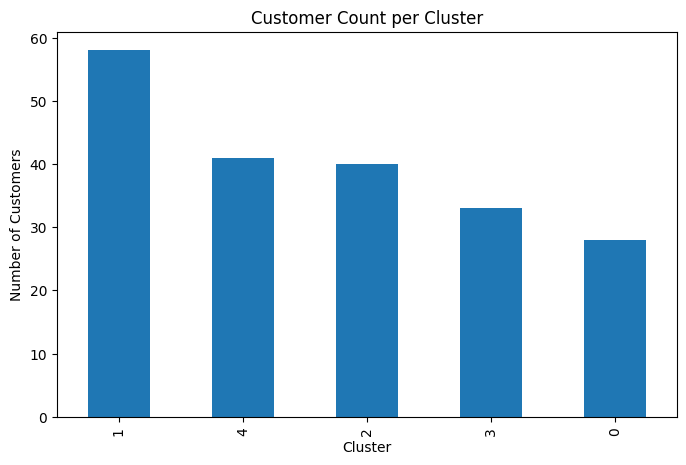

In [ ]:
cluster_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

The elbow method for K-means analysis indicated an optimal value of \( k = 4 \), resulting in well-separated clusters. Customers were categorized based on **Spending Score** and **Annual Income**, effectively distinguishing high/low spenders and income brackets. The cluster characteristics were as follows:  

- **Cluster 1**: High-income, high-spending customers  
- **Cluster 2**: Low-income, low-spending customers  
- **Cluster 3**: High-income, low-spending customers  
- **Cluster 4**: Moderate-income, moderate-spending customers  

In comparison, DBSCAN clustering achieved a silhouette score of 0.967, the highest among the models. It identified a small percentage of customers as noise, possibly representing outliers. Meanwhile, the Gaussian Mixture Model (GMM) produced a silhouette score of 0.441, highlighting soft overlaps between clusters and indicating that some customers shared characteristics across multiple groups.

Overall, High-income, high-spending customers are the best customers and you don't necessarily need to do much to have them stay loyal. Now for High-income, low-spending customers you should focus on ways to keep them loyal so that they'll spend more money. An example of this could be a membership program with discounts on targeted products.